# **Strategy to Boost Supermarket Sales in January**

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into new year. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In this year, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Supermarket-January-2017.xlsx) or you can just use this link https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Supermarket-January-2017.xlsx. It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

# **Scoring Rubric (Total 100 points)**




1.   Class Attendance: 0 / 10

2.   On-time Submission:  0 / 10

3.   EDA Quality & Visualisations:
*   Correct loading and checking of data: 0 / 5
*   Meaningful descriptive stats: 0 / 5
*   At least 2 clear plots with short interpretations: 0 / 5 / 10

4.   Data Preprocessing & Basket Creation
*   Proper column selection and cleaning decisions explained: 0 / 10
*   Correct aggregation to transaction level and one-hot encoding: 0 / 10

5.   ARM Implementation (Apriori Rules)
*   Correct use of apriori() with appropriate min_support values: 0 / 10
*   Correct use of association_rules() with appropriate filtering: 0 / 10

6.   Insights & Business Recommendations
*   Interpretation of rules: 0 / 10
*   Realistic managerial actions:  0 / 10

# **Import Library**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings(
    "ignore",
    category=DeprecationWarning,
    module="jupyter_client.session"
)

!pip install mlxtend==0.23.1

# **Load Dataset**

In [2]:
# Load Dataset
pd.set_option("display.max_columns", None)

df = pd.read_excel("https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Supermarket-January-2017.xlsx")
df.head()

,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,NAMA,BIN,KDBIN,TGL_TRANS,NO_BKT,NO_ORD,STS_BYR,SLD_AK,SLD_AKG,QTY,HRG_OLD,HRGBL_OLD,HRG_PKK,HRG_JUL,DISC,DISC1,DISC2,JLH_DIS,JLH_DIS1,JLH_DIS2,HRGJL_OLD,HRGJL1_OLD,HRGJL2_OLD,SUPP_OLD,DISB1_OLD,DISB2_OLD,PPN,PPN_OLD,PPNBM,PPNBM_OLD,JLH_TRANS,KET_TRANS,PTS_GDG,PTS_KEL,PTS_ITEM,QTY_PTS,TRNBL,POST,TGL_OLD,FILLER,SUPPLIER,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,KERTAS KADO SINAR DU,NaN,NaN,2017-01-02,060102001,NaN,CD,NaN,NaN,2.0,1100.0,NaN,549.98,1100.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2200.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701022e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,PIGEON BTL PP RP 240,NaN,NaN,2017-01-02,060102002,NaN,CD,NaN,NaN,1.0,23000.0,NaN,20640.45,23000.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,23000.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701029e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,MR SEKAR TANJUNG KB,13.0,NaN,2017-01-02,060102003,NaN,CD,NaN,NaN,1.0,9500.0,NaN,8720.00,9500.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,9500.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701030e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,BIORE BF 100ML WHITE,NaN,NaN,2017-01-02,060102003,NaN,CD,NaN,NaN,1.0,6900.0,NaN,6215.00,6900.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,6900.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701020e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,OVALE LULUR BALI BEN,NaN,NaN,2017-01-02,060102003,NaN,CD,NaN,NaN,1.0,13500.0,NaN,12119.65,13500.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,13500.0,CASH DISCOUNT,NaN,NaN,NaN,NaN,N,NaN,NaT,1.701020e+11,NaN,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


In [3]:
# Check shape of the dataset
df.shape

(148489, 61)

In [4]:
# View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [5]:
# View the statistical summary of numerical variables
df.describe()

,KDSUP,KAS,KDSLS,ITEM,BIN,KDBIN,TGL_TRANS,NO_ORD,SLD_AK,SLD_AKG,QTY,HRG_OLD,HRGBL_OLD,HRG_PKK,HRG_JUL,DISC,DISC1,DISC2,JLH_DIS,JLH_DIS1,JLH_DIS2,HRGJL_OLD,HRGJL1_OLD,HRGJL2_OLD,SUPP_OLD,DISB1_OLD,DISB2_OLD,PPN,PPN_OLD,PPNBM,PPNBM_OLD,JLH_TRANS,PTS_GDG,PTS_KEL,PTS_ITEM,QTY_PTS,TGL_OLD,FILLER,SUPPLIER,DEP_SWA,TANGGAL,LAMA_CRD
count,40832.000000,136294.000000,0.0,148486.000000,13586.000000,0.0,148486,0.0,11769.000000,9350.000000,148486.000000,145702.000000,9350.000000,148486.000000,148486.000000,146957.000000,14695.000000,10753.000000,0.0,0.0,0.0,10879.000000,9350.000000,9350.000000,9350.000000,9350.000000,9350.000000,146600.000000,9350.000000,9350.000000,9350.000000,1.484860e+05,0.0,0.0,0.0,0.0,8847,1.484860e+05,7264.000000,1668.000000,148486,37.0
mean,650.873384,4.497381,NaN,21322.181445,8.858531,NaN,2017-01-15 21:02:24.159045376,NaN,20.819228,15.819209,3.163174,21828.817133,20286.487016,19901.017212,21795.990560,0.437617,2.995218,0.402527,NaN,NaN,NaN,22094.795018,1.848663,395.584588,387.137540,3.703390,0.339132,0.334158,3.749733,0.000160,0.001176,6.137361e+04,NaN,NaN,NaN,NaN,2016-12-07 05:29:26.429297920,1.717615e+11,313.185573,1.182854,2017-01-15 21:34:32.486295296,0.0
min,0.000000,1.000000,NaN,1.000000,1.000000,NaN,2017-01-01 00:00:00,NaN,-12.000000,-12.000000,1.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,2013-09-24 00:00:00,1.701010e+11,0.000000,1.000000,2017-01-01 00:00:00,0.0
25%,30.000000,3.000000,NaN,5221.000000,6.000000,NaN,2017-01-07 00:00:00,NaN,0.000000,0.000000,1.000000,4500.000000,4500.000000,3728.920000,4425.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,5000.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.800000e+03,NaN,NaN,NaN,NaN,2016-12-01 00:00:00,1.701077e+11,8.000000,1.000000,2017-01-07 00:00:00,0.0
50%,999.000000,5.000000,NaN,13839.000000,8.000000,NaN,2017-01-15 00:00:00,NaN,3.000000,2.000000,1.000000,9700.000000,10302.000000,8365.180000,9600.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,11000.000000,0.000000,0.000000,184.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.270000e+04,NaN,NaN,NaN,NaN,2016-12-22 00:00:00,1.701160e+11,69.000000,1.000000,2017-01-16 00:00:00,0.0
75%,999.000000,6.000000,NaN,35802.750000,13.000000,NaN,2017-01-25 00:00:00,NaN,13.000000,11.000000,2.000000,20250.000000,19786.940000,17769.380000,20200.000000,0.000000,3.000000,0.000000,NaN,NaN,NaN,23000.000000,0.000000,0.000000,603.000000,4.000000,0.000000,0.000000,10.000000,0.000000,0.000000,3.060000e+04,NaN,NaN,NaN,NaN,2017-01-05 00:00:00,1.701251e+11,444.000000,1.000000,2017-01-25 00:00:00,0.0
max,1769.000000,15.000000,NaN,700047.000000,19.000000,NaN,2017-01-31 00:00:00,NaN,2663.000000,1748.000000,2000.000000,700000.000000,517273.000000,720000.000000,900000.000000,50.000000,50.000000,31.400000,NaN,NaN,NaN,536900.000000,6250.000000,120600.000000,1769.000000,40.000000,31.400000,10.000000,10.000000,0.100000,9.000000,3.778570e+07,NaN,NaN,NaN,NaN,2017-01-31 00:00:00,7.013157e+11,1769.000000,2.000000,2017-02-01 00:00:00,0.0
std,467.837803,1.906136,NaN,25881.022963,4.537190,NaN,NaN,NaN,70.033381,54.576439,16.266576,40163.889928,34874.831844,38566.965857,40289.934102,2.475039,5.732793,1.739868,NaN,NaN,NaN,36368.941118,103.933377,2753.395563,471.396592,6.200473,1.727602,1.631778,4.841419,0.004002,0.095344,3.981378e+05,NaN,NaN,NaN,NaN,NaN,2.951083e+10,463.993685,0.386662,NaN,0.0


# **Data Cleaning**

In [6]:
# Drop unused columns
df.drop(columns=["KD_SBR", "TP_TRN", "KDSUP", "KAS", "TRN_DK", "GDG", "GGD", "KDSLS", "ITEM", "BIN", "KDBIN", "TGL_TRANS", "NO_ORD", "STS_BYR", "SLD_AK", "SLD_AKG", "HRG_OLD", "HRGBL_OLD", "DISC", "DISC1", "DISC2", "JLH_DIS", "JLH_DIS1", "JLH_DIS2", "HRGJL_OLD", "HRGJL1_OLD", "HRGJL2_OLD", "SUPP_OLD", "DISB1_OLD", "DISB2_OLD", "PPN", "PPN_OLD", "PPNBM", "PPNBM_OLD", "KET_TRANS", "PTS_GDG", "PTS_KEL", "PTS_ITEM", "QTY_PTS", "TRNBL", "POST", "TGL_OLD", "FILLER", "SUPPLIER", "DEP_SWA", "GON", "KONS", "POST_STOK", "STATUS", "TP_ADJ", "LAMA_CRD"], inplace=True)

In [7]:
df.head()

,KEL,NAMA,NO_BKT,QTY,HRG_PKK,HRG_JUL,JLH_TRANS,USER,TANGGAL,JAM
0,KERTAS,KERTAS KADO SINAR DU,060102001,2.0,549.98,1100.0,2200.0,MIA,2017-01-02,08:12:02
1,BTL/DOT,PIGEON BTL PP RP 240,060102002,1.0,20640.45,23000.0,23000.0,MIA,2017-01-02,08:24:51
2,MUSTIKA,MR SEKAR TANJUNG KB,060102003,1.0,8720.00,9500.0,9500.0,MIA,2017-01-02,08:28:18
3,SABUN.C,BIORE BF 100ML WHITE,060102003,1.0,6215.00,6900.0,6900.0,MIA,2017-01-02,08:28:22
4,LULURMD,OVALE LULUR BALI BEN,060102003,1.0,12119.65,13500.0,13500.0,MIA,2017-01-02,08:28:20


In [8]:
# Check missing values
df.isna().sum()

,0
KEL,3
NAMA,3
NO_BKT,3
QTY,3
HRG_PKK,3
HRG_JUL,3
JLH_TRANS,3
USER,3
TANGGAL,3
JAM,3


In [9]:
# Drop null values
df = df.dropna()

In [10]:
# Check for duplicate rows in dataset
df[df.duplicated(keep=False)]

,KEL,NAMA,NO_BKT,QTY,HRG_PKK,HRG_JUL,JLH_TRANS,USER,TANGGAL,JAM


# **Exploratory Data Analysis (EDA)**

## **Top 10 Items by Revenue**

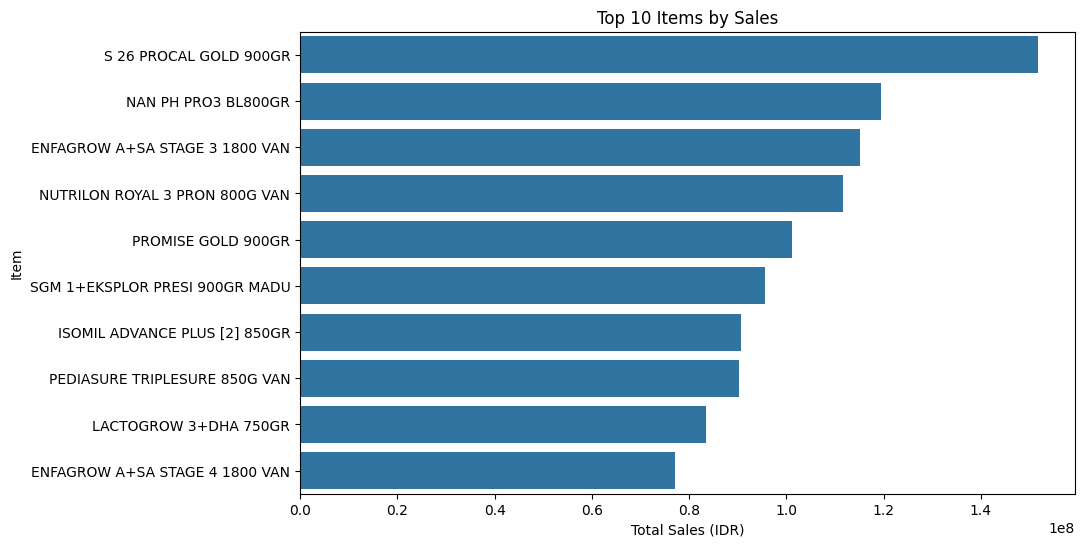

In [11]:
top_items = df.groupby("NAMA")["JLH_TRANS"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_items.values, y=top_items.index)
plt.title("Top 10 Items by Sales")
plt.xlabel("Total Sales (IDR)")
plt.ylabel("Item")
plt.show()

The sales data reveals that revenue is dominated by infant formula products, with premium brands such as S26 Procal Gold, NAN PH Pro3, Enfagrow, and Nutrilon Royal consistently appearing at the top. Among them, S26 Procal Gold 900gr stands out as the strongest SKU, significantly outperforming the rest, indicating strong customer preference and high repeat demand. This suggests that the store’s revenue is heavily dependent on premium baby milk categories, which typically have stable, recurring purchase patterns.

## **Daily Sales Trend**

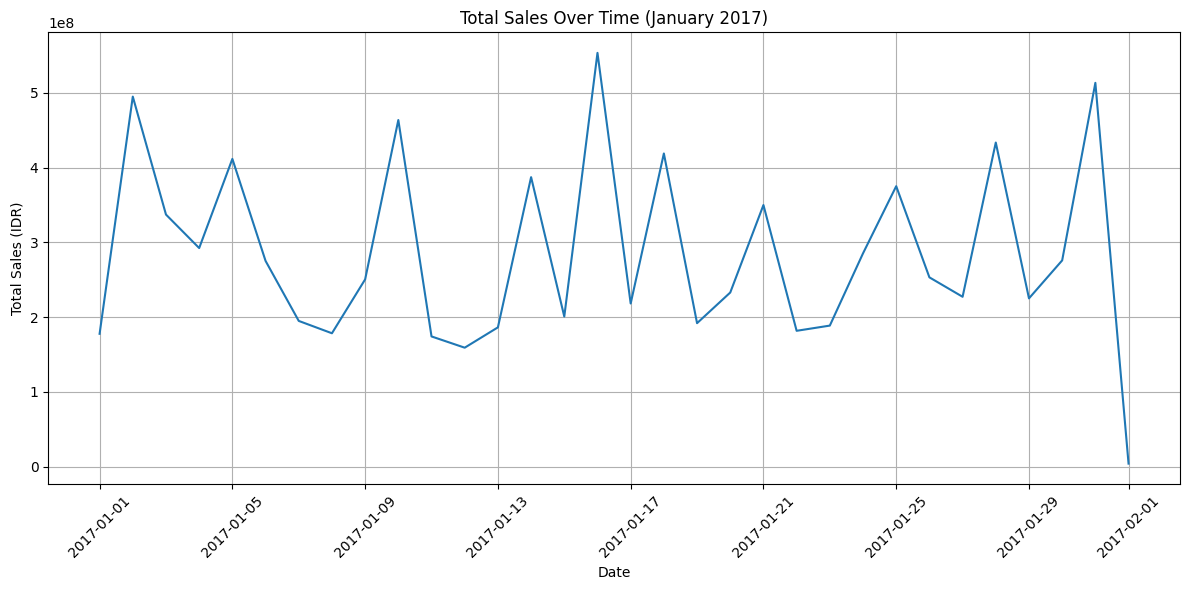

In [12]:
daily_sales = df.groupby('TANGGAL')['JLH_TRANS'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='TANGGAL', y='JLH_TRANS', data=daily_sales)
plt.title('Total Sales Over Time (January 2017)')
plt.xlabel('Date')
plt.ylabel('Total Sales (IDR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The time-series visualization for January 2017 shows that daily sales fluctuate sharply without a uniform weekly pattern. There are several noticeable spikes—especially on January 2, 10, 14-17, 20, and 30—indicating days with increased customer traffic or bulk purchases. In contrast, mid-month periods tend to experience consistent dips, suggesting naturally slower activity during those days. Toward the end of the month, sales generally rise again, likely influenced by payday cycles or planned monthly shopping behavior.

# **Apriori Algorithm**

## **Data Preparation**

In [13]:
# Grouping items by transaction
basket = df.groupby(['NO_BKT', 'KEL'])['KEL'].count().unstack().reset_index().fillna(0).set_index('NO_BKT')
basket.head()

KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,ALATPEL,ALBUM,AMPLOP,ASBAK,ASESORS,ASHOLAT,ASTOR,ATTACK,B DAPUR,B KUE,B POKOK,B.DWS,BABY HP,BAMBI,BANTAL,BATERAI,BEDAKBY,BELIA,BERAS,BGAMBAR,BIORE,BISC BY,BISCKLG,BISCPAK,BOLPOIN,BONEKA,BTL/DOT,BUBURBY,BUKU,BUMBU,C.MANIA,CALCULT,CAMILAN,CAMPINA,CANGKIR,CD.ANAK,CELANA,CELENGN,CETAKAN,COKLAT,COLOGBY,COLOGNE,COTTONB,CUSSONS,DDORANT,DETERJN,DEVA,ELEKTRO,ESKAN,ESSENSE,FANBO,FIESTA,GARAM,GAS,GATSBY,GAYUNG,GERY,GOODTIM,GT MINI,GUCI,GULA,GUNTING,H.TONIC,HAIR SP,HANDUK,HANGER,HBL,HUKI,IKAT.P,INEZ,INSECTA,J.HUJAN,JAM,JOHNSON,K.KAKI,KACANG,KAIN,KAMPER,KAPAS,KARDUS,KARET,KARTU,KC MATA,KECAP,KEJU,KERTAS,KERUPUK,KESET,KIPAS,KONDOM,KOPI,KOSMETC,KOTAK.S,KUE,KUEPIA,LAMPU,LATULIP,LAURIER,LILIN,LULURMD,M.ANGIN,M.GOSOK,M.HEWAN,M.KOTAK,M.RAMBT,MADU,MAINAN,MAKANAN,MANGKOK,MANISAN,MARGARN,MARINA,MCEREAL,MIE,MINUMAN,MINYAK,MISSIS,MKALENG,MOIST,MUSTIKA,N.COMPU,NAMPAN,NIVEA,NYAM MO,NYAM2,O.KUMUR,OBAT,OBATPEL,P GIGI,P.BOTOL,P.DALAM,P.RUMAH,P.WAJAH,PAKAIAN,PAMPERS,PARCEL,PARFUME,PAYUNG,PEHARUM,PELICIN,PEMBERS,PEMUTIH,PENGHRM,PENSIL,PEREKAT,PERMEN,PH M,PIGEON,PIRING,PIXY,PLASTIK,PMBALUT,PNLINER,POND'S,PSCUKUR,PUTERI,RAMROSE,RED.A,ROKOK,ROTI.B,SABUN.C,SABUN.M,SABUN.T,SABUNCP,SABUNKS,SABUNMK,SAMBAL,SANDAL,SAPU,SARIAYU,SARUNGT,SAUS,SEBAMED,SELAI,SEMIR.R,SEMIR.S,SENDOK,SEPATU,SERBET,SETRIKA,SHAMPOO,SHAPES,SIKAT,SIKAT G,SINGLET,SIRUP,SISIR,SKIPPY,SNACK,SO GOOD,SOFTENR,SOKLIN,SOSIS,SPIDOL,STANGAN,SUKANDA,SUP,SUSU,SUSU KL,SUSU KM,SUSU KT,SYLVERY,TALC,TAS,TEH,TELUR,TEMPATT,TEPAK,TEPUNG,THERMOS,TIGA R,TIM WFR,TIMBA,TIMTAM,TIPE-X,TISSU B,TISSUE,TOPI,TOPLES,TPENSIL,TS HILO,TS LOWF,TS SWET,TUSUK G,TUTUP,VAPE,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0001/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0002/0117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0003/0117,0.0,0.0,0.0,0

In [14]:
# Convert quantities to 1 and 0
basket = basket.applymap(lambda x: 1 if x > 0 else 0)
basket.head()

/tmp/ipython-input-2315103059.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,ALATPEL,ALBUM,AMPLOP,ASBAK,ASESORS,ASHOLAT,ASTOR,ATTACK,B DAPUR,B KUE,B POKOK,B.DWS,BABY HP,BAMBI,BANTAL,BATERAI,BEDAKBY,BELIA,BERAS,BGAMBAR,BIORE,BISC BY,BISCKLG,BISCPAK,BOLPOIN,BONEKA,BTL/DOT,BUBURBY,BUKU,BUMBU,C.MANIA,CALCULT,CAMILAN,CAMPINA,CANGKIR,CD.ANAK,CELANA,CELENGN,CETAKAN,COKLAT,COLOGBY,COLOGNE,COTTONB,CUSSONS,DDORANT,DETERJN,DEVA,ELEKTRO,ESKAN,ESSENSE,FANBO,FIESTA,GARAM,GAS,GATSBY,GAYUNG,GERY,GOODTIM,GT MINI,GUCI,GULA,GUNTING,H.TONIC,HAIR SP,HANDUK,HANGER,HBL,HUKI,IKAT.P,INEZ,INSECTA,J.HUJAN,JAM,JOHNSON,K.KAKI,KACANG,KAIN,KAMPER,KAPAS,KARDUS,KARET,KARTU,KC MATA,KECAP,KEJU,KERTAS,KERUPUK,KESET,KIPAS,KONDOM,KOPI,KOSMETC,KOTAK.S,KUE,KUEPIA,LAMPU,LATULIP,LAURIER,LILIN,LULURMD,M.ANGIN,M.GOSOK,M.HEWAN,M.KOTAK,M.RAMBT,MADU,MAINAN,MAKANAN,MANGKOK,MANISAN,MARGARN,MARINA,MCEREAL,MIE,MINUMAN,MINYAK,MISSIS,MKALENG,MOIST,MUSTIKA,N.COMPU,NAMPAN,NIVEA,NYAM MO,NYAM2,O.KUMUR,OBAT,OBATPEL,P GIGI,P.BOTOL,P.DALAM,P.RUMAH,P.WAJAH,PAKAIAN,PAMPERS,PARCEL,PARFUME,PAYUNG,PEHARUM,PELICIN,PEMBERS,PEMUTIH,PENGHRM,PENSIL,PEREKAT,PERMEN,PH M,PIGEON,PIRING,PIXY,PLASTIK,PMBALUT,PNLINER,POND'S,PSCUKUR,PUTERI,RAMROSE,RED.A,ROKOK,ROTI.B,SABUN.C,SABUN.M,SABUN.T,SABUNCP,SABUNKS,SABUNMK,SAMBAL,SANDAL,SAPU,SARIAYU,SARUNGT,SAUS,SEBAMED,SELAI,SEMIR.R,SEMIR.S,SENDOK,SEPATU,SERBET,SETRIKA,SHAMPOO,SHAPES,SIKAT,SIKAT G,SINGLET,SIRUP,SISIR,SKIPPY,SNACK,SO GOOD,SOFTENR,SOKLIN,SOSIS,SPIDOL,STANGAN,SUKANDA,SUP,SUSU,SUSU KL,SUSU KM,SUSU KT,SYLVERY,TALC,TAS,TEH,TELUR,TEMPATT,TEPAK,TEPUNG,THERMOS,TIGA R,TIM WFR,TIMBA,TIMTAM,TIPE-X,TISSU B,TISSUE,TOPI,TOPLES,TPENSIL,TS HILO,TS LOWF,TS SWET,TUSUK G,TUTUP,VAPE,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0001/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0002/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0003/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0004/0117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
000

## **Finding Frequent Itemsets**

In [18]:
# Set threshold value untuk digunakan dalam penghitungan support
from mlxtend.frequent_patterns import apriori, association_rules

df_apriori = apriori(basket, min_support = 0.03, use_colnames = True)
df_apriori

/usr/local/lib/python3.12/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.037991,(AIR.M)
1,0.032251,(ASESORS)
2,0.033590,(B DAPUR)
3,0.063600,(BISCPAK)
4,0.032360,(COKLAT)
5,0.083607,(DETERJN)
6,0.044823,(KOPI)
7,0.031841,(M.GOSOK)
8,0.078878,(MIE)
9,0.091888,(MINUMAN)


Support tells you how frequently the itemset appears in the entire dataset. A minimum support of 0.03 means: Only rules where the items appear in at least 3% of all transactions are considered. This filters out extremely rare combinations and keeps only patterns that occur regularly enough to matter.

In [28]:
df_ar = association_rules(df_apriori, metric = "confidence", min_threshold = 0.4)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(SABUN.M),(P GIGI),0.087624,0.076227,0.040860,0.466313,6.117413,0.034181,1.730927,0.916873
1,(P GIGI),(SABUN.M),0.076227,0.087624,0.040860,0.536034,6.117413,0.034181,1.966473,0.905561
2,(SHAMPOO),(P GIGI),0.082595,0.076227,0.037991,0.459960,6.034072,0.031695,1.710565,0.909385
3,(P GIGI),(SHAMPOO),0.076227,0.082595,0.037991,0.498387,6.034072,0.031695,1.828907,0.903116
4,(SABUN.M),(SHAMPOO),0.087624,0.082595,0.039494,0.450717,5.456932,0.032256,1.670187,0.895187
5,(SHAMPOO),(SABUN.M),0.082595,0.087624,0.039494,0.478160,5.456932,0.032256,1.748382,0.890280


Confidence measures how often the consequent appears when the antecedent appears. A minimum confidence of 0.4 means: For a rule A → B to be kept, at least 40% of the customers who bought A must also buy B. This ensures the rules reflect reliable co-purchase behavior, not random coincidence.

## **Interpretation of Rules**

### **Rule 1: (SABUN.M) → (P GIGI)**
This rule indicates that customers who purchase SABUN.M (medium-size soap) are highly likely to also purchase P GIGI (toothpaste) in the same transaction. With a confidence of about 46.6%, nearly half of soap buyers also buy toothpaste. The lift value of 6.11 suggests that this co-purchase happens over six times more frequently than what would be expected by random chance, meaning the items have a very strong complementary relationship. This pattern implies that customers often buy soap as part of a broader personal hygiene shopping trip, making toothpaste a natural companion product.

### **Rule 2: (P GIGI) → (SABUN.M)**
The reverse rule shows an even stronger behavior: customers who buy toothpaste tend to also purchase medium-size soap, with a confidence of 53.6%. This mutual association reinforces that soap and toothpaste form a popular hygiene bundle. A lift of 6.11 again signals a highly significant relationship far above normal co-occurrence. This suggests toothpaste serves as a “trigger” item that frequently leads to additional hygiene purchases, supporting strategies like placing these items close together or offering bundle promotions.

### **Rule 3: (SHAMPOO) → (P GIGI)**
This rule shows that customers who buy shampoo also tend to add toothpaste to their cart. The confidence of 45.9% means almost half of shampoo buyers also buy toothpaste. With a lift of 6.03, this relationship is much stronger than random expectation, implying a habitual shopping pattern where toothpaste is part of a typical personal-care routine. This association shows that customers often restock multiple hygiene essentials in the same transaction.

### **Rule 4: (P GIGI) → (SHAMPOO)**
The reverse direction indicates that roughly 49.8% of customers who buy toothpaste also buy shampoo, making toothpaste a strong indicator of broader hygiene purchasing behavior. The lift value of 6.03 confirms a robust association, showing that toothpaste buyers are significantly more likely to buy shampoo than the general customer base. This highlights toothpaste as a strong anchor product for cross-selling personal-care items like shampoo.

### **Rule 5: (SABUN.M) → (SHAMPOO)**
This rule shows that customers purchasing medium-size soap frequently pair it with shampoo, with a confidence of 45%. The lift of 5.46 indicates a strong relationship, well above random expectation. This suggests customers who are buying soap are often replenishing multiple hygiene items at once, possibly during routine restocking cycles. The combination of soap and shampoo reflects a typical personal-care product bundle.

### **Rule 6: (SHAMPOO) → (SABUN.M)**
The final rule highlights that buyers of shampoo also tend to purchase medium-size soap, with a confidence of 47.8%. The significant lift value of 5.45 reinforces the strength of this association. This implies that shampoo buyers often complete their hygiene necessities by adding soap, supporting the idea that these items are strongly complementary. It reinforces that personal-care items tend to be purchased together as part of a regular restock pattern.

# **Realistic Managerial Actions**

### **Rule 1: (SABUN.M) → (P GIGI)**
**Customers who buy bath soap also tend to buy toothpaste.**

Place small toothpaste displays or travel-size toothpaste near the bath‐soap aisle to encourage add-on purchases. The store can also run bundle promotions such as “Buy 2 bath soaps, get 10% off toothpaste” to directly drive toothpaste sales.

### **Rule 2: (P GIGI) → (SABUN.M)**
**People purchasing toothpaste tend to also buy bath soap.**

Introduce cross-promotions at the toothpaste section, such as recommended bath-soap options or combo packs. Managers can ensure that multiple soap variants are stocked near oral-care products to capitalize on the association.

### **Rule 3: (SHAMPOO) → (P GIGI)**
**Shampoo buyers are also likely to buy toothpaste.**

Place toothpaste on end-caps or secondary displays close to the shampoo aisle. Promotions like “Personal Care Essentials Pack” combining shampoo and toothpaste can boost total category revenue.

### **Rule 4: (P GIGI) → (SHAMPOO)**
**Toothpaste buyers also tend to purchase shampoo.**

The store can highlight shampoo brands in the oral-care aisle with cross-selling signage. A loyalty-program offer such as “Buy toothpaste 5 times, get a shampoo discount” can help lift shampoo sales driven by repeat oral-care purchases.

### **Rule 5: (SABUN.M) → (SHAMPOO)**
**Customers who buy bath soap often buy shampoo.**

Since soap and shampoo purchases are strongly related, management can place these products in adjacent racks or create a unified “Bathing Essentials” section. This reduces shopper effort and increases the likelihood of customers buying both items together.

### **Rule 6: (SHAMPOO) → (SABUN.M)**
**Shampoo buyers are also inclined to buy bath soap.**

Managers can place soap and shampoo in visually connected displays (e.g., shampoo on eye-level shelves and soap just below or beside it). This coordinated layout strengthens cross-selling and ensures customers see both items during their purchase routine.